## Step 1 : Reading and Understanding Data


In [16]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel('Case Study Data 1.xlsx')

In [18]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [19]:
df['Number of Brands'].value_counts()

0    6449
1    1453
2     717
3     577
4     355
5     213
6     103
7      55
8      14
9       2
Name: Number of Brands, dtype: int64

## Step 2 : Data Preparation


In [20]:
data = df[['Retailer Name','Number of Brands','Total Sales']]
data.head()

,Retailer Name,Number of Brands,Total Sales
0,Retailer 1,1,30826.6100
1,Retailer 2,3,67713.1692
2,Retailer 3,3,65006.4054
3,Retailer 4,0,0.0000
4,Retailer 5,0,0.0000


Text(0.5, 0, 'Attributes')

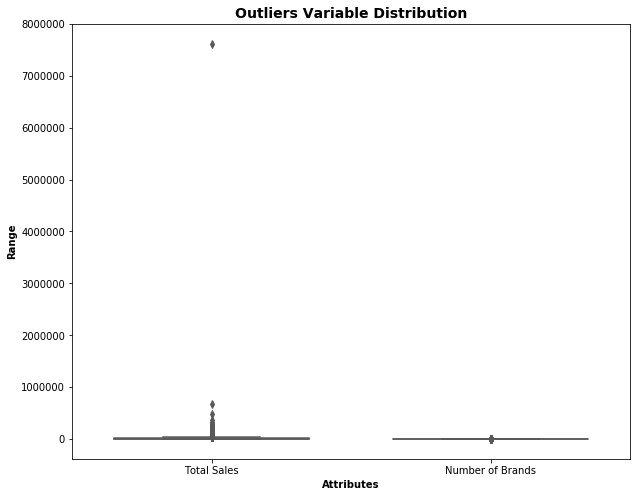

In [21]:
import seaborn as sns
attributes = ['Total Sales','Number of Brands']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [22]:
# Removing (statistical) outliers for Total Sales
Q1 = data['Total Sales'].quantile(0.05)
Q3 = data['Total Sales'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Total Sales'] >= Q1 - 1.5*IQR) & (data['Total Sales'] <= Q3 + 1.5*IQR)]

In [23]:
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
data['Total Sales_scaled'] = scaler.fit_transform(data['Total Sales'].values.reshape(-1,1))
data.shape

(9873, 4)

In [24]:
data.head()

,Retailer Name,Number of Brands,Total Sales,Total Sales_scaled
0,Retailer 1,1,30826.6100,0.697261
1,Retailer 2,3,67713.1692,2.165782
2,Retailer 3,3,65006.4054,2.058021
3,Retailer 4,0,0.0000,-0.530002
4,Retailer 5,0,0.0000,-0.530002


## Step 4 : Building the Model
### K-Means Clustering

In [25]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data[['Total Sales_scaled','Number of Brands']])
kmeans.labels_

array([2, 1, 1, ..., 0, 2, 0])

In [26]:
data['Category of Retailer'] = kmeans.labels_
data.head()

,Retailer Name,Number of Brands,Total Sales,Total Sales_scaled,Category of Retailer
0,Retailer 1,1,30826.6100,0.697261,2
1,Retailer 2,3,67713.1692,2.165782,1
2,Retailer 3,3,65006.4054,2.058021,1
3,Retailer 4,0,0.0000,-0.530002,0
4,Retailer 5,0,0.0000,-0.530002,0


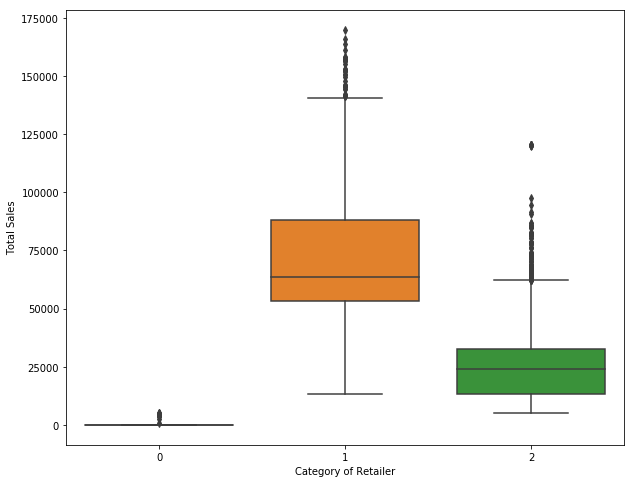

In [27]:
# Box plot to visualize Category of retailer vs Total Sales

sns.boxplot(x='Category of Retailer', y='Total Sales', data=data)

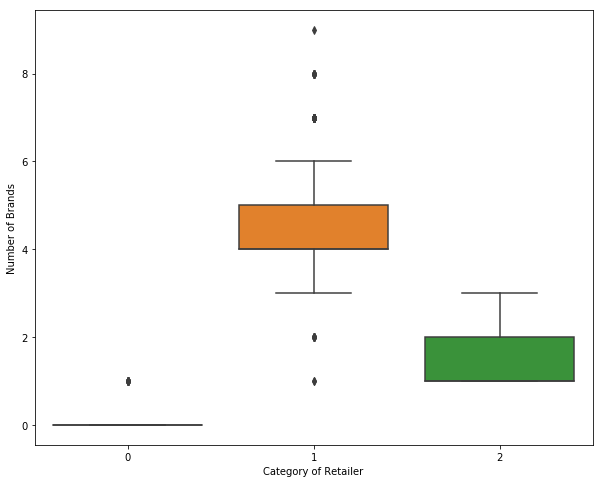

In [28]:
# Box plot to visualize Category of retailer vs No. of Brands

sns.boxplot(x='Category of Retailer', y='Number of Brands', data=data)

In [29]:
for i in range(data.shape[0]):
    if(data['Category of Retailer'].iloc[i]== 0):
        data['Category of Retailer'].iloc[i]= 'C'
    if(data['Category of Retailer'].iloc[i]== 1):
        data['Category of Retailer'].iloc[i]= 'A'
    if(data['Category of Retailer'].iloc[i]== 2):
        data['Category of Retailer'].iloc[i]= 'B'
data.head(5)

C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Retailer Name,Number of Brands,Total Sales,Total Sales_scaled,Category of Retailer
0,Retailer 1,1,30826.6100,0.697261,B
1,Retailer 2,3,67713.1692,2.165782,A
2,Retailer 3,3,65006.4054,2.058021,A
3,Retailer 4,0,0.0000,-0.530002,C
4,Retailer 5,0,0.0000,-0.530002,C


In [30]:
data.to_csv(('category_of_retailers.csv'),index=False)

## Step 5 : Final Analysis
### Inference:
### K-Means Clustering with 3 Category of Retailer

##### Customers with Category of Retailer A  are the Retailers with high amount of Total Sales & placed regular order as compared to other retailers.
##### Customers with Category of Retailer B having moderate sales.
##### Customers with Category of Retailer C are one who placed irregular orders and hence least of importance from business point of view.